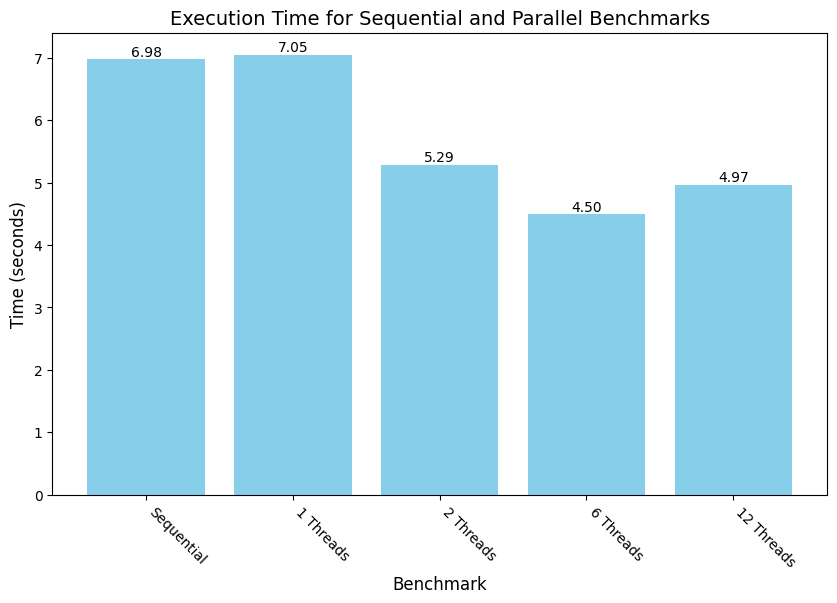

In [3]:
import re
import matplotlib.pyplot as plt

# 1. Read the contents of the file into a string variable.
with open('exercise2_benchmark.out', 'r') as file:
    file_content = file.read()

# 2. Use regular expressions to extract information.
sequential_times = re.findall(r'Run \d+ took (\d+\.\d+) seconds', file_content)
thread_counts = re.findall(r'Parallel Benchmark \((\d+) threads\):', file_content)
parallel_times = re.findall(r'Run \d+ with \d+ threads took (\d+\.\d+) seconds', file_content)

# 3. Store the extracted data in lists.
sequential_times = [float(time) for time in sequential_times]
thread_counts = [int(count) for count in thread_counts]
parallel_times = [float(time) for time in parallel_times]

# 4. Create labels for the bar plot.
labels = ['Sequential'] + [f'{threads} Threads' for threads in thread_counts]

# 5. Calculate average times.
avg_sequential_time = sum(sequential_times) / len(sequential_times)
avg_parallel_times = [sum(parallel_times[i:i+10]) / 10 for i in range(0, len(parallel_times), 10)]
times = [avg_sequential_time] + avg_parallel_times

# 6. Create a bar plot using Matplotlib.
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(labels, times, color='skyblue')
plt.xlabel('Benchmark', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Execution Time for Sequential and Parallel Benchmarks', fontsize=14)
plt.xticks(rotation=-45, ha="left")  # Rotate x labels for readability

# Add labels on top of the bars
for i, time in enumerate(times):
    plt.text(i, time, f'{time:.2f}', ha='center', va='bottom')

# 7. Display the plot.
plt.show()